In [410]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

from catboost import CatBoostClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vector-borne-disease-prediction/testt.csv
/kaggle/input/vector-borne-disease-prediction/trainn.csv
/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


All symptoms and Prognosis included associated with 11 Vector Borne Diseases.

Coverage
TEMPORAL COVERAGE START DATE
04/13/2020
TEMPORAL COVERAGE END DATE
12/21/2022
GEOSPATIAL COVERAGE
Ar

In [411]:
pd.read_csv('/kaggle/input/playground-series-s3e13/sample_submission.csv').head()

,id,prognosis
0,707,Dengue Zika Japanese_encephalitis
1,708,Dengue Zika Japanese_encephalitis
2,709,Dengue Zika Japanese_encephalitis
3,710,Dengue Zika Japanese_encephalitis
4,711,Dengue Zika Japanese_encephalitis


In [412]:
R_STATE = 33
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 1000)

In [413]:
pd.read_csv('/kaggle/input/playground-series-s3e13/sample_submission.csv')

,id,prognosis
0,707,Dengue Zika Japanese_encephalitis
1,708,Dengue Zika Japanese_encephalitis
2,709,Dengue Zika Japanese_encephalitis
3,710,Dengue Zika Japanese_encephalitis
4,711,Dengue Zika Japanese_encephalitis
...,...,...
298,1005,Dengue Zika Japanese_encephalitis
299,1006,Dengue Zika Japanese_encephalitis
300,1007,Dengue Zika Japanese_encephalitis
301,1008,Dengue Zika Japanese_encephalitis


In [414]:
train = pd.read_csv('/kaggle/input/playground-series-s3e13/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e13/test.csv').drop("id", axis=1)
real = pd.read_csv('/kaggle/input/vector-borne-disease-prediction/trainn.csv')
real2 = pd.read_csv('/kaggle/input/vector-borne-disease-prediction/testt.csv')

In [415]:
real

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chikungunya
1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chikungunya
2,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chikungunya
3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chikungunya
4,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chikungunya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,1,0,0,1,0,0,1,1,Lyme disease
248,0,1,1,1,1,0,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,Lyme disease
249,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,0,0,1,1,0,0,1,0,1,1,1,Lyme disease
250,0,0,0,1,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,Lyme disease


In [416]:
set(real.prognosis.unique()) == set(train.prognosis.unique())

False

In [417]:
real.prognosis = real.prognosis.apply(lambda name: name.replace(" ", "_"))

In [418]:
set(real.prognosis.unique()) == set(train.prognosis.unique())

True

In [419]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

In [420]:
train.prognosis.unique()

array(['Lyme_disease', 'Tungiasis', 'Zika', 'Rift_Valley_fever',
       'West_Nile_fever', 'Malaria', 'Chikungunya', 'Plague', 'Dengue',
       'Yellow_Fever', 'Japanese_encephalitis'], dtype=object)

In [421]:
df = pd.concat([train, real], axis=0)
df.drop("id", axis=1, inplace=True)
df


,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Lyme_disease
248,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
249,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
250,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Lyme_disease


In [422]:
predictors = list(df.columns)[:-1]
target = df.prognosis

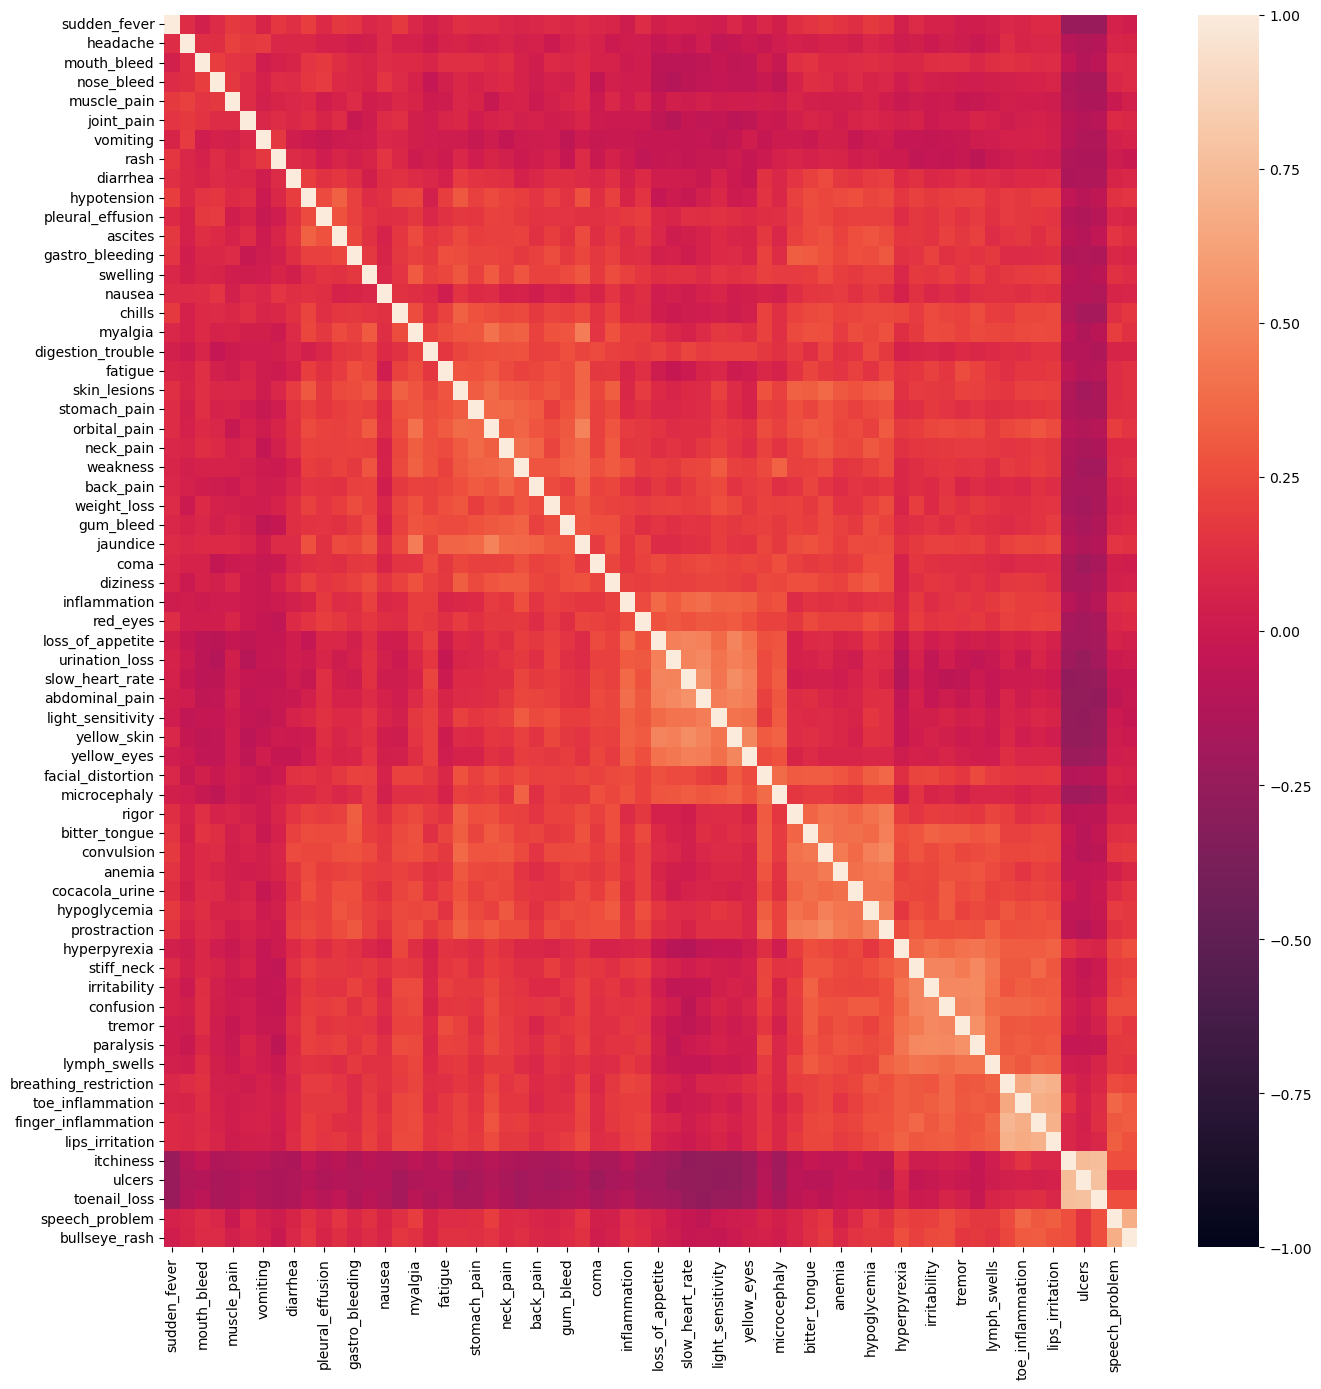

In [423]:
fig, ax = plt.subplots(figsize=(14,14))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, ax=ax, )

plt.tight_layout()
plt.show()

In [424]:
df.prognosis.value_counts()

West_Nile_fever          108
Japanese_encephalitis    104
Tungiasis                 93
Rift_Valley_fever         93
Chikungunya               89
Dengue                    86
Yellow_Fever              84
Zika                      81
Plague                    76
Lyme_disease              74
Malaria                   71
Name: prognosis, dtype: int64

### SMOTE to balance the classes

In [425]:
sm = SMOTE(random_state=R_STATE)
X_res, y_res = sm.fit_resample(df.drop("prognosis", axis=1), df.prognosis)
df = X_res
df["prognosis"] = y_res
df.prognosis.value_counts(), df.shape

(Lyme_disease             108
 Tungiasis                108
 Zika                     108
 Rift_Valley_fever        108
 West_Nile_fever          108
 Malaria                  108
 Chikungunya              108
 Plague                   108
 Dengue                   108
 Yellow_Fever             108
 Japanese_encephalitis    108
 Name: prognosis, dtype: int64,
 (1188, 65))

## PCA Analysis

In [426]:
n_components = 0.9
pca = PCA(n_components=n_components)
df_reduced = pca.fit_transform(df[predictors])

n_pcs = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_features = [predictors[most_important[i]] for i in range(n_pcs)]
unimportant_features = set(predictors) - set(most_important_features)


In [427]:
print(len(unimportant_features) , " features not deemed important")
print("\n")
print(unimportant_features) 

31  features not deemed important


{'hypoglycemia', 'pleural_effusion', 'back_pain', 'urination_loss', 'abdominal_pain', 'anemia', 'ulcers', 'breathing_restriction', 'toenail_loss', 'bullseye_rash', 'tremor', 'convulsion', 'irritability', 'neck_pain', 'sudden_fever', 'paralysis', 'toe_inflammation', 'yellow_eyes', 'confusion', 'digestion_trouble', 'facial_distortion', 'speech_problem', 'stiff_neck', 'prostraction', 'lips_irritation', 'bitter_tongue', 'myalgia', 'red_eyes', 'lymph_swells', 'ascites', 'finger_inflammation'}


## Feature engineering

AI grouped the similar features for me

In [428]:
def count_symptoms(row):
    count = 0
    for p in predictors:
        if row[p] == 1:
            count += 1
    return count

NUM_CLUSTERS = 5
kmeans = KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(df[predictors])

KMeans(n_clusters=5)

In [429]:
df["num_symptoms"] = df[predictors].apply(count_symptoms, axis=1)
df["cluster"] = kmeans.predict(df[predictors])

test["num_symptoms"] = test[predictors].apply(count_symptoms, axis=1)
test["cluster"] = kmeans.predict(test[predictors])


In [430]:
groups = {
    'neuro': ['coma', 'diziness', 'confusion', 'tremor', 'paralysis', 'speech_problem'],
    'pain': ['headache', 'muscle_pain', 'joint_pain', 'stiff_neck', 'finger_inflammation', 'ulcers', 'myalgia'],
    'bleeding': ['mouth_bleed', 'nose_bleed', 'gastro_bleeding', 'gum_bleed'],
    'digestive': ['vomiting', 'diarrhea', 'nausea', 'digestion_trouble', 'stomach_pain', 
                           'abdominal_pain', 'cocacola_urine', 'ulcers']
}

# Add new features for groups with at least 3 symptoms
for group_name, group_symptoms in groups.items():
    df[f'{group_name}_related'] = df[group_symptoms].sum(axis=1).apply(lambda x: 1 if x >= 3 else 0)
    test[f'{group_name}_related'] = test[group_symptoms].sum(axis=1).apply(lambda x: 1 if x >= 3 else 0)

In [431]:
df.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis,num_symptoms,cluster,neuro_related,pain_related,bleeding_related,digestive_related
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease,28,0,1,1,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis,6,3,0,0,0,1
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease,51,4,1,1,1,1
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika,28,1,0,0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever,6,3,0,0,0,0


In [432]:
## not used

#ohe = OneHotEncoder()
#X = df.drop("prognosis", axis=1)
#y = df.prognosis
#y_encoded = ohe.fit_transform(y.to_numpy().reshape(-1, 1)).toarray()



In [433]:
# Removing low importance features

#df.drop(unimportant_features, axis=1, inplace=True)
#test.drop(unimportant_features, axis=1, inplace=True)

In [434]:
X = df.drop("prognosis", axis=1)
y = df.prognosis

In [435]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [436]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=None,random_state=R_STATE)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
print(classification_report(y_test, rfc_pred))

                       precision    recall  f1-score   support

          Chikungunya       0.80      0.89      0.84         9
               Dengue       0.31      0.31      0.31        13
Japanese_encephalitis       0.14      0.11      0.12         9
         Lyme_disease       0.86      0.67      0.75         9
              Malaria       0.86      0.50      0.63        12
               Plague       0.71      0.71      0.71        14
    Rift_Valley_fever       0.46      0.40      0.43        15
            Tungiasis       0.40      0.50      0.44        12
      West_Nile_fever       0.14      0.10      0.12        10
         Yellow_Fever       0.31      0.71      0.43         7
                 Zika       0.80      0.89      0.84         9

             accuracy                           0.51       119
            macro avg       0.53      0.53      0.51       119
         weighted avg       0.53      0.51      0.51       119



In [437]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [445]:
cbc = CatBoostClassifier(loss_function='MultiClass', learning_rate= None, iterations=1000, depth=None , verbose=False)
cbc.fit(x_train, y_train)
cbc_pred = cbc.predict(x_test)
print(classification_report(y_test, cbc_pred))

                       precision    recall  f1-score   support

          Chikungunya       0.89      0.89      0.89         9
               Dengue       0.40      0.31      0.35        13
Japanese_encephalitis       0.00      0.00      0.00         9
         Lyme_disease       0.67      0.67      0.67         9
              Malaria       0.90      0.75      0.82        12
               Plague       0.80      0.57      0.67        14
    Rift_Valley_fever       0.50      0.47      0.48        15
            Tungiasis       0.46      0.50      0.48        12
      West_Nile_fever       0.33      0.40      0.36        10
         Yellow_Fever       0.38      0.71      0.50         7
                 Zika       0.64      0.78      0.70         9

             accuracy                           0.54       119
            macro avg       0.54      0.55      0.54       119
         weighted avg       0.55      0.54      0.54       119



In [439]:
cbc.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MultiClass',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'class_names': ['Chikungunya',
  'Dengue',
  'Japanese_encephalitis',
  'Lyme_disease',
  'Malaria',
  'Plague',
  'Rift_Valley_fever',
  'Tungiasis',
  'West_Nile_fever',
  'Yellow_Fever',
  'Zika'],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_est

In [440]:
def submission_csv(trained_model, test_data, indexes, filename):
    class_names = trained_model.classes_
    top3 = np.argsort(-trained_model.predict_proba(test_data), axis=1)[:, :3]
    preds = [' '.join(class_names[top3[i]]) for i in range(len(top3))]
    pd.DataFrame(zip(indexes, preds), columns=["id", "prognosis"]).to_csv(f"{filename}.csv", index=False)


In [441]:
selected_sample = 0
sel_model = rfc
class_names = rfc.classes_
top3 = np.argsort(-sel_model.predict_proba(test), axis=1)[:, :3]
preds = [', '.join(class_names[top3[i]]) for i in range(len(top3))]


symptoms_list = []
for col in test.columns:
    if test.iloc[selected_sample][col] == 1:
        symptoms_list.append(col)

print(f"symptoms: {', '.join(symptoms_list)}")
print("\n")
print(f"possible diseases: {preds[selected_sample]}")       


symptoms: hypotension, back_pain, loss_of_appetite, slow_heart_rate, light_sensitivity, rigor, hyperpyrexia, tremor


possible diseases: Dengue, Rift_Valley_fever, Tungiasis


In [442]:
#submission_csv(cbc, test, range(707,1010), "cbc pca 0.999 FE ")